In [ ]:
# установить свежую версию
!pip install scipy==1.5.2

In [ ]:
import math
import numpy as np
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt 

#### Критерий однородности Колмогорова-Смирнова

Гипотезы об однородности выборок – это гипотезы о том, что рассматриваемые выборки извлечены из одной и той же генеральной совокупности.

$\xi$, $F(x)$, $X_{[n]}$

$\eta$, $G(x)$, $Y_{[m]}$

$F(x)$ и $G(x)$ **непрерывны**.

$H_0: F(x) = G(x)$ для всех $x \in \mathbb R$

$H_1: F(x) \neq G(x)$ для всех $x \in \mathbb R$

 Если $H_0$ верна, то $F(x) = G(x) = F_0(X)$

 $F^*_n$ эмпирическая ф-я распределения, построенная по выборке $X_{[n]}$

 $G^*_m$ эмпирическая ф-я распределения, построенная по выборке $Y_{[m]}$

$F^*_n$ и $G^*_m$ являются приближением $F_0(x)$, в случае, когда верна $H_0$, то

$|F^*_n - G^*_m| \xrightarrow[n, m \rightarrow \infty]{} 0$ 

##### Теорема

$D_{m,n} = \overset{}{\underset{x \in \mathbb R}{sup}} | G^*_n(x, Y_{[m]}) - F^*_n(x, X_{[n]})|$

Если $F_0(x) = F(x) = G(x)$ непрерывна, тогда

$P(\sqrt{\frac{mn}{m + n}} D_{m, n} < z) \xrightarrow[n, m \rightarrow \infty]{} K(z) = \sum \limits_{j = - \infty}^{\infty} (-1)^j e^{-2j^2z^2}$, где

$K(z)$ ф-я распред. Колмогорова

##### Статистический критерий

$\sqrt{\frac{mn}{m + n}} D_{m,n} \sim K(z) $

##### Scipy

st.ks_2samp(a1, a2) отдаем два списка с выборками, получаем статистику $D_{m,n}$ и $p_{value}$

In [ ]:
a1 = [73, 81, 103, 88, 131, 106, 107, 111, 122, 108]
a2 = [156, 171, 133, 102, 129, 150, 120, 110, 112, 130]

st.ks_2samp(a1, a2)

KstestResult(statistic=0.6, pvalue=0.05244755244755244)

##### Критическая область

$V_k = (d_{1 - \alpha}, + \infty)$, где

$d_{1 - \alpha}$ квантиль Колмогорова.

$JB \in V_k \Rightarrow H_0$ отвергается.

##### Задача №1

Кокаин чрезвычайно вреден для сердца, он может вызвать инфаркт миокарда даже у молодых людей без атеросклероза. Кокаин сужает коронарные сосуды, что приводит к уменьшению притока крови к миокарду кроме того, он ухудшает насосную функцию сердца. Нифедипин (препарат из группы антагонистов кальция) обладает способностью расширять сосуды, его применяют при ишемической болезни сердца. Ш. Хейл и соавт. (S. L. Hale, К. J. Alker, S. H. Rezkalla et al. Nifedipine protects the heart from the acute deleterious effects of cocaine if administered before but not after cocaine. Circulation, 83:1437—1443, 1991) предположили, что нифедипин можно использовать и при поражении сердца,
вызванном кокаином. Собакам вводили кокаин, а затем нифедипин либо физиологический раствор. Показателем насосной функции сердца служило среднее артериальное давление. Были получены следующие данные.
Среднее артериальное давление после приема кокаина, мм рт. ст.

[156, 171, 133, 102, 129, 150, 120, 110, 112, 130] плацебо

[73, 81, 103, 88, 131, 106, 107, 111, 122, 108] нифедипин

Влияет ли нифедипин на среднее артериальное давление после приема кокаина?

Найдите значение статистики критерия Колмогорова-Смирнова.

Чему равен квантиль, участвующий в формировании критической области? Примите статистическое решение

**Решение:**

Имеем две выборки $X_{n}$ плацебо и $Y_{n}$ нифедипин.

Построим интервалы длиной 10, от 70 до 180, но последний интервал возьмем 160-171.

После вычислим $n_i, m_i$ кол-во попавших эл-ов в $i$ интервал для каждой выборки.

Вычислим накопленные частоты для обоих выборок $n^{accum}_i, m^{accum}_i$

Вычислим значений эмпирических ф-й по накопленным частотам $F^*(n^{accum}_i) = \frac{n^{accum}_i}{n}$ и $G^*(m^{accum}_i) = \frac{m^{accum}_i}{m}$.

Далее возьмем максимальную абсолютную разность

$D_{m,n} = \overset{}{\underset{x \in \mathbb R}{sup}} |F^*(n^{accum}_i) - G^*(m^{accum}_i) |$

И в конце домножим на корень выражения и получим значение выборочного критерия

$\sqrt{\frac{mn}{m + n}} D_{m,n}$

Решение с использованием Scipy

In [ ]:
from scipy.stats import ks_2samp

a1 = [73, 81, 103, 88, 131, 106, 107, 111, 122, 108]
a2 = [156, 171, 133, 102, 129, 150, 120, 110, 112, 130]

ks_2samp(a1,a2)[0]*np.sqrt((n*m)/(n+m))

1.3416407864998738

Пробовал решить тремя разными вариантами, подошёл только последний!

Вариант 1

Данный вариант был решен аналогично решению [этой задачи](https://www.matburo.ru/Examples/Files/ms_pg_20.pdf). Какими интервалы брать не столь важно, пробовал разные, итоговый результат получается один и тот же!

In [ ]:
df = pd.DataFrame({'m': [73, 81, 103, 88, 131, 106, 107, 111, 122, 108], 'n': [156, 171, 133, 102, 129, 150, 120, 110, 112, 130]})
# создадим нужные нам интервалы
bins = np.concatenate(([-np.inf], np.arange(70, 171, 10), [np.inf]))
# подсчитаем количество элементов в интервале для двух выборок
a = df.groupby(pd.cut(df.n, bins).rename('intervals'), observed=False).apply(lambda x: len(x)).reset_index().rename(columns={0: 'n'})
b = df.groupby(pd.cut(df.m, bins).rename('intervals'), observed=False).apply(lambda x: len(x)).reset_index().rename(columns={0: 'm'})
# объединим по столбцу 'intervals' наши две таблицы
df = pd.merge(a, b, on=['intervals'])
df

,intervals,n,m
0,"(-inf, 70.0]",0,0
1,"(70.0, 80.0]",0,1
2,"(80.0, 90.0]",0,2
3,"(90.0, 100.0]",0,0
4,"(100.0, 110.0]",2,4
5,"(110.0, 120.0]",2,1
6,"(120.0, 130.0]",2,1
7,"(130.0, 140.0]",1,1
8,"(140.0, 150.0]",1,0
9,"(150.0, 160.0]",1,0


In [ ]:
# вычислим накопленные частоты
df = pd.merge(df,
              df.rolling(len(df), min_periods = 0).sum().astype('int').rename(columns={'n': 'n_accum', 'm': 'm_accum'}),
              left_index=True, 
              right_index=True)
df

,intervals,n,m,n_accum,m_accum
0,"(-inf, 70.0]",0,0,0,0
1,"(70.0, 80.0]",0,1,0,1
2,"(80.0, 90.0]",0,2,0,3
3,"(90.0, 100.0]",0,0,0,3
4,"(100.0, 110.0]",2,4,2,7
5,"(110.0, 120.0]",2,1,4,8
6,"(120.0, 130.0]",2,1,6,9
7,"(130.0, 140.0]",1,1,7,10
8,"(140.0, 150.0]",1,0,8,10
9,"(150.0, 160.0]",1,0,9,10


Вычислим значения эмпирических ф-й по накопленным частотам $F^*(n^{accum}_i) = \frac{n^{accum}_i}{n}$ и $G^*(m^{accum}_i) = \frac{m^{accum}_i}{m}$.

In [ ]:
df['F'] = df['n_accum'].values / df['n'].values.sum()
df['G'] = df['m_accum'].values / df['n'].values.sum()
df

,intervals,n,m,n_accum,m_accum,F,G
0,"(-inf, 70.0]",0,0,0,0,0.0,0.0
1,"(70.0, 80.0]",0,1,0,1,0.0,0.1
2,"(80.0, 90.0]",0,2,0,3,0.0,0.3
3,"(90.0, 100.0]",0,0,0,3,0.0,0.3
4,"(100.0, 110.0]",2,4,2,7,0.2,0.7
5,"(110.0, 120.0]",2,1,4,8,0.4,0.8
6,"(120.0, 130.0]",2,1,6,9,0.6,0.9
7,"(130.0, 140.0]",1,1,7,10,0.7,1.0
8,"(140.0, 150.0]",1,0,8,10,0.8,1.0
9,"(150.0, 160.0]",1,0,9,10,0.9,1.0


Вычислим абсолютную разницу $|F^*(n^{accum}_i) - G^*(m^{accum}_i)|$

In [ ]:
df['difference'] = np.abs(df['F'].values - df['G'].values)
df

,intervals,n,m,n_accum,m_accum,F,G,difference
0,"(-inf, 70.0]",0,0,0,0,0.0,0.0,0.0
1,"(70.0, 80.0]",0,1,0,1,0.0,0.1,0.1
2,"(80.0, 90.0]",0,2,0,3,0.0,0.3,0.3
3,"(90.0, 100.0]",0,0,0,3,0.0,0.3,0.3
4,"(100.0, 110.0]",2,4,2,7,0.2,0.7,0.5
5,"(110.0, 120.0]",2,1,4,8,0.4,0.8,0.4
6,"(120.0, 130.0]",2,1,6,9,0.6,0.9,0.3
7,"(130.0, 140.0]",1,1,7,10,0.7,1.0,0.3
8,"(140.0, 150.0]",1,0,8,10,0.8,1.0,0.2
9,"(150.0, 160.0]",1,0,9,10,0.9,1.0,0.1


Далее возьмем максимальную абсолютную разность, это и будет выборочный статистический критерий $D_{m, n}$

$D_{m,n} = \overset{}{\underset{x \in \mathbb R}{sup}} |F^*(n^{accum}_i) - G^*(m^{accum}_i) |$

In [ ]:
Dmn = df['difference'].max()
Dmn

0.49999999999999994

И в конце домножим на корень выражения и получим значение выборочного критерия

$\sqrt{\frac{mn}{m + n}} D_{m,n}$

In [ ]:
m = df['m'].values.sum()
n = df['n'].values.sum()
SK = math.sqrt(m * n / (m + n)) * Dmn
SK

1.1180339887498947

такой вариант решения система не приняла

Вариант 2

В качестве интервалов возьмем точки из выборки m, и относительно их вычислим вероятности для выборки m и n.

In [ ]:
df = pd.DataFrame({'m': np.sort([73, 81, 103, 88, 131, 106, 107, 111, 122, 108]), 'n': np.sort([156, 171, 133, 102, 129, 150, 120, 110, 112, 130])})
df

,m,n
0,73,102
1,81,110
2,88,112
3,103,120
4,106,129
5,107,130
6,108,133
7,111,150
8,122,156
9,131,171


In [ ]:
# вычислим вероятности для функции G, относительно интервалов из выборки m
f = lambda x: len(df.m[df.m < df.m[x]]) / len(df)
df['G'] = list(map(f, range(len(df))))

# вычислим вероятности для функции F, относительно интервалов из выборки m
f = lambda x: len(df.n[df.n < df.m[x]]) / len(df)
df['F'] = list(map(f, range(len(df))))

df

,m,n,G,F
0,73,102,0.0,0.0
1,81,110,0.1,0.0
2,88,112,0.2,0.0
3,103,120,0.3,0.1
4,106,129,0.4,0.1
5,107,130,0.5,0.1
6,108,133,0.6,0.1
7,111,150,0.7,0.2
8,122,156,0.8,0.4
9,131,171,0.9,0.6


Построим для наглядности график

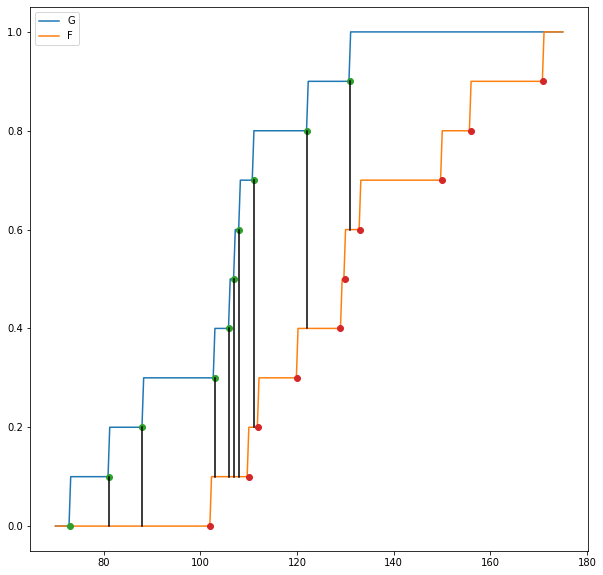

In [ ]:
import scipy as sc
plt.figure(figsize=(10,10))

n = len(df)

X = np.linspace(70, 175, 300)
# построим эмпирическую ф-ю G
cdf_m = sc.vectorize( lambda x: len(df.m[df.m < x]) / n)
plt.plot(X, cdf_m(X), label='G')
# построим эмпирическую ф-ю F
cdf_n = sc.vectorize( lambda x: len(df.n[df.n < x]) / n)
plt.plot(X, cdf_n(X), label='F')
# красные точки, какие значения принимает ф-я G
plt.plot(df.m, cdf_m(df.m), 'o')
# зеленые точки, какие значения принимает ф-я F
plt.plot(df.n, cdf_n(df.n), 'o')

# соединим две точки, которые показывают разницу функций F и G, относительно точек из выборки m
for i in range(n):
  # две точки x, одинаковые
  x = [df.m[i]] + [df.m[i]]
  # значение функции G и F в точке x из выборки m
  y = [cdf_n(df.m)[i]] + [cdf_m(df.m)[i]]
  plt.plot(x, y, '-', color='black')

plt.legend();

In [ ]:
# вычислим абсолютную разницу, между ф-й G и F В точках выборки m
df['differents'] = np.abs(df['G'] - df['F'])
df

,m,n,G,F,differents
0,73,102,0.0,0.0,0.0
1,81,110,0.1,0.0,0.1
2,88,112,0.2,0.0,0.2
3,103,120,0.3,0.1,0.2
4,106,129,0.4,0.1,0.3
5,107,130,0.5,0.1,0.4
6,108,133,0.6,0.1,0.5
7,111,150,0.7,0.2,0.5
8,122,156,0.8,0.4,0.4
9,131,171,0.9,0.6,0.3


In [ ]:
Dmn = df['differents'].max()
SK = math.sqrt(n * n / (n + n)) * Dmn
SK

1.118033988749895

Вариант 3

Этот вариант в итоге приняла система.

Получим значения эмпирических ф-й распределения, а далее сравнив $G(x_{(i)})$ с $F(x_{(i)})$ и $F(x_{(i + 1)})$, возьмем максимальное значение, как здесь [6.1 Критерии согласия хи-квадрат и Колмогорова](https://stepik.org/lesson/26280/step/10?unit=8173)

In [ ]:
Fe = np.concatenate((df['G'].values, [1]))
Ft = df['F'].values

In [ ]:
d1 = np.abs(Fe[:-1] - Ft).max()
d2 = np.abs(Fe[1:] - Ft).max()
Dmn = max(d1, d2)
SK = math.sqrt(n * n / (n + n)) * Dmn
SK

1.341640786499874

Чему равен квантиль, участвующий в формировании критической области? Примите статистическое решение?

$V_k = (d_{1 - \alpha}, + \infty)$, где

$d_{1 - \alpha}$ квантиль Колмогорова.

In [ ]:
alpha = 0.02
st.kstwobign.ppf(1 - alpha)

1.5174269646320033

$V_k = (1.517, + \infty)$

$SK = 1.34$

$SK \notin V_k \Rightarrow H_0$ не отвергается.

**Ответ:**

$SK = \sqrt{\frac{mn}{n + m}} D_{m,n} = 1.34$

$d_{1 - \alpha} = 1.52$

$H_0$ не отвергается

#### Критерий однородности $\chi^2$  

##### Случаи использования

Критерий применяется для проверки однородности двух и более выборок. Кроме того его можно использовать для проверки однородности как количественных характеристик, так и категориальных.

Например, мы хотим проверить, одинаково ли проголосовали на выборах жители разных регионов России. Или одинаково ли автомобили выбирают мужчины и женщины.

Рассмотрим $k$ ген. совокупностей $\xi_1, ..., \xi_k$.

$F_j(x)$ ф-я распределения ген. совок. $\xi_j$.

Пусть из ген. совок. $\xi_j$ извлечена выборка объемом $n_j$, обозначим эту выборку

$X^j_{[n_j]} = (x^j_1, ..., x^j_{n_j})$



##### Гипотеза

Требуется проверить гипотезу о том, что ф-я распределения сл. вел. $\xi_1, ..., \xi_k$ равны между собой и равны ф-и распределения, т.е. выборки однородны и взяты из одной и той же ген. совокупности.

$H_0: F_{\xi_1} = ... = F_{\xi_k} = F_{\xi}$ для всех $x \in \mathbb R$

Существует как минимум две сл. вел. для которых ф-и распределения не равны.

$H_1: \exists F_{\xi_i} \neq F_{\xi_j}$

##### На чём основывается критерий

Основывается на сравнении наблюдаемых частот и ожидаемых частот.

Разобъем множество значений $\xi_1, ..., \xi_k$ на интервалы

$\Delta_1, ..., \Delta_r: \Delta_i = (a_{i-1}, a_i], i = \overline {1,r}$

$p_i = P(\xi_1 \in \Delta_i|H_0) = ... = P(\xi_k \in \Delta_i|H_0)$

$n_{ij} = num(X^j_s \in \Delta_i)$ наблюдаемые частоты

$\sum \limits_{i=1}^r p_i = 1$, $\sum \limits_{i=1}^n n_{ij} = n_j$, где 

$n_j$ объем $j$-ой выборки.


##### Статистика

$Z_j = \sum \limits_{i=1}^r \frac{n_j}{p_i} \bigg ( \frac{n_{ij}}{n_j} - p_i \bigg )^2 = \sum \limits_{i=1}^r \frac{(n_{ij} - n_jp_i)^2}{n_jp_i} $, где

$n_{ij}$ наблюдаемые частоты (эмпирические)

$n_jp_i$ ожидаемые частоты (теоритические)

$Z_j = \sum \limits_{j=1}^k \sum \limits_{i=1}^r \frac{(n_{ij} - n_jp_i)^2}{n_jp_i}$

можно было бы составить такую статистику, сравнив ожидаемые частоты с наблюдаемыми у всех выборок, но нам неизвестна вероятность $p_i$. Поэтому нам необходимо найти оценки $p_i$.

Оценки вероятностей $p_i$ мы можем найти с помощью метода максимального правдоподобия. В данном случае, функция правдоподобия будет выглядеть.

$L = \frac{n!}{v_1! \cdot ... \cdot v_r} \prod\limits_{i = 1}^r p_i^{v_i}$, где

$v_i$ общее число наблюдений, попавших в $i$-ый интервал, подсчитанное по всем выборкам.

$v_i = \sum \limits_{j=1}^k n_{ij}$, где $i = \overline {1,r}$

$\hat{p_i} = \frac{v_i}{n}$, где $n$ суммарный объем всех выборок $n = \sum \limits_{j=1}^k n_j$

Подставим найденные оценки $p_i$ в статистику $Z$ и получим наш статистический критерий

##### Статистический критерий

$\chi^2 = n \sum \limits_{j=1}^k \sum \limits_{i=1}^r \frac{(n_{ij} - n_j \frac{v_i}{n})^2}{n_jv_i} \sim \chi^2_{r-1, k-1}$, где 

$r-1, k-1$ степени свободы.

##### Критическая область

$V_k = (\chi^2_{1 - \alpha, r - 1, k - 1}, + \infty)$

$\chi^2_в \in V_k \Rightarrow H_0$ отвергается.

$p_{value} = 1 - F_{\chi^2}(\chi^2_в)$

$p_{value} < \alpha \Rightarrow H_0$ отвергается.

$\chi^2_в$ выборочная статистика критерия

##### Пример

Выясним, одинаково ли важна цена для мужчин и женщин при выборе автомобиля. Было опрошено 150 мужчин и 150 женщин. Им предлагалось оценить, насколько важна цена автомобиля при выборе нового автомобиля.

Результаты представлены в таблице, в которой мы видим, что пропорции ответов "важна" и "очень важна" для мужчин и женщин разные. Давайте выясним, насколько значима данная разница.

In [ ]:
pd.DataFrame({'цена': ['м', 'ж'], 'неважна': [3, 6], 'мало важна': [6, 9], 'важна': [85, 60], 'очень важна': [56, 75]})

,цена,неважна,мало важна,важна,очень важна
0,м,3,6,85,56
1,ж,6,9,60,75


Для того, чтобы ответить на данный вопрос, давайте формализуем проверяемую гипотезу

$H_0: p^м_i = p^ж_i$ для всех $i = \overline {1,4}$

$H_0: p^м_i \neq p^ж_i$ для всех $i = \overline {1,4}$

Нам необходимо проверить однородность ответов мужчин и женщин, в данном случае ответы являются категориальными или качественными характеристиками. 

$n$ = 300

$n_1 = 150$ кол-во опрошенных мужчин

$n_1 = 150$ кол-во опрошенных женщин

Найдём, сколько наблюдений из двух выборок попадают в категории 'неважна', 'мало важна', 'важна', 'очень важна', мы их обозначим через $v_1, v_2, v_3, v_4$.

In [ ]:
pd.DataFrame({'цена': ['м', 'ж', 'vi'], 'неважна': [3, 6, 9], 'мало важна': [6, 9, 15], 'важна': [85, 60, 145], 'очень важна': [56, 75, 131]})

,цена,неважна,мало важна,важна,очень важна
0,м,3,6,85,56
1,ж,6,9,60,75
2,vi,9,15,145,131


Легко показать, что ожидаемое число наблюдений, в случае когда мужчины и женщины выбирают ответ 'цена не важно', будет меньше 5.

$n_j\hat{p_i} \leq 5$, где

$n_j$ кол-во эл-ов из выборки $j$.

$\hat{p_i} = \frac{v_i}{n}$, где

$n$ суммарный объем всех выборок $n = \sum \limits_{j=1}^k n_j$

$v_i$ общее число наблюдений, попавших в $i$-ый интервал, подсчитанное по всем выборкам.

$v_i = \sum \limits_{j=1}^k n_{ij}$, где $i = \overline {1,r}$

In [ ]:
nj = 3
n = 300
vi = 9
pi = vi / n
p_hat = nj * pi
p_hat <= 5

True

Поэтому мы объедними два интервала, два ответа 'неважна', 'мало важна'

In [ ]:
df = pd.DataFrame({'цена': ['м', 'ж', 'vi'], 'неважна и мало важна': [9, 15, 24], 'важна': [85, 60, 145], 'очень важна': [56, 75, 131]})
df

,цена,неважна и мало важна,важна,очень важна
0,м,9,85,56
1,ж,15,60,75
2,vi,24,145,131


На основе новой таблицы находим оценки вероятности $\hat{p} = \frac{v_i}{n}$

In [ ]:
vi = df.iloc[2, 1:].values.astype('int')
pi = np.round(vi / n, 2)
pi

array([0.08, 0.48, 0.44])

In [ ]:
pd.DataFrame({'цена': ['м', 'ж', 'vi', 'pi'], 'неважна и мало важна': [9, 15, 24, 0.08], 'важна': [85, 60, 145, 0.48], 'очень важна': [56, 75, 131, 0.44]})

,цена,неважна и мало важна,важна,очень важна
0,м,9.00,85.00,56.00
1,ж,15.00,60.00,75.00
2,vi,24.00,145.00,131.00
3,pi,0.08,0.48,0.44


Найдём выборочный критерий $\chi^2_в = n \sum \limits_{j=1}^k \sum \limits_{i=1}^r \frac{(n_{ij} - n_j \frac{v_i}{n})^2}{n_jv_i}$

$n_{i,j}$ кол-во эл-ов из $j$ выборки, попавшие в $i$ интервал.

$n_j$ кол-во эл-ов в $j$ выборке.

$n$ кол-во эл-ов всех выборок

$v_i$ кол-во эл-ов из всех выборок, попавших в $i$ интервал.

В нашем случае две выборки, $k=2$, значит будет два слагаемых

$\chi^2_в = n (\sum \limits_{i=1}^r \frac{(n_{i1} - n_1 \frac{v_i}{n})^2}{n_1v_i} + \sum \limits_{i=1}^r \frac{(n_{i2} - n_2 \frac{v_i}{n})^2}{n_2v_i} )$

In [ ]:
n1 = 150
n2 = 150
n = 300
ni1 = df.iloc[0, 1:].values.astype('int')
ni2 = df.iloc[1, 1:].values.astype('int')
vi = df.iloc[2, 1:].values.astype('int')

In [ ]:
sum1 = np.sum( ((ni1 - (n1 * (vi/n)))**2) / (n1 * vi) )
sum2 = np.sum( ((ni2 - (n2 * (vi/n)))**2) / (n2 * vi) )

chi2v = n * (sum1 + sum2)
chi2v

8.5660700184259

Найдём квантиль $\chi^2_{(1 - \alpha, k - 1, r - 1)}$

In [ ]:
k = 2
r = 3
alpha = 0.05
st.chi2.ppf(1 - alpha, k - 1, r - 1)

6.991464547107979

$\chi^2_в = 8.5$

$\chi^2_{1 - \alpha, k - 1, r - 1} = 5.84$

$V_k = (5.84, + \infty)$

$\chi^2_в \in V_k \Rightarrow H_0$ отвергается.

**Ответ:**

$H_0$ отклоняется. Значит для мужчин и женщин, цена автомобиля важна по разному.

##### Задача №1

Кто выше баскетболисты или волейболисты?

200,190,195,190,194,202,202,207,205,220,213,196,203 рост баскетбалистов

205,202,218,213,198,198,195,204,197,202,201,205,201,197,198,197,209 рост волейболистов

Проверьте гипотезу об однородности с помощью критерия хи-квадрат при уровне значимости 0.05.

Изначально разбейте множество значений обеих выборок на следующие интервалы:

[189,200], (200, 210], (210,221]

При необходимости объедините соседние интервалы (ожидаемые частоты во всех ячейках должны быть не меньше 5)

Чему равна статика критерия (в данном случае вычисляем без поправки Йетса)?

Чему равна статика критерия, если использовать поправку Йетса?

Проверьте гипотезу об однородности с помощью критерия хи-квадрат при уровне значимости 0.05.

**Решение:**

Вначале построим интервалы и подсчитаем кол-во попаданий в них.

In [ ]:
X = pd.Series([200,190,195,190,194,202,202,207,205,220,213,196,203])
Y = pd.Series([205,202,218,213,198,198,195,204,197,202,201,205,201,197,198,197,209])

df = pd.DataFrame({'basket': X, 'volleyball': Y})
# создадим нужные нам интервалы
#bins = np.concatenate(([-np.inf], np.arange(70, 171, 10), [np.inf]))
bins = [189, 200, 210, 221]
# подсчитаем количество элементов в интервале для двух выборок
a = df.groupby(pd.cut(df.basket, bins).rename('intervals'), observed=False).apply(lambda x: len(x)).reset_index().rename(columns={0: 'nij'})
b = df.groupby(pd.cut(df.volleyball, bins).rename('intervals'), observed=False).apply(lambda x: len(x)).reset_index().rename(columns={0: 'mij'})
# объединим по столбцу 'intervals' наши две таблицы
df = pd.merge(a, b, on=['intervals'])
df

,intervals,nij,mij
0,"(189, 200]",6,7
1,"(200, 210]",5,8
2,"(210, 221]",2,2


In [ ]:
df['vi'] = df['nij'] + df['mij']
df

,intervals,nij,mij,vi
0,"(189, 200]",6,7,13
1,"(200, 210]",5,8,13
2,"(210, 221]",2,2,4


Проверим условие

$n_j\hat{p_i} \leq 5$, где

$n_j$ кол-во эл-ов из выборки $j$.

$\hat{p_i} = \frac{v_i}{n}$, где

$n$ суммарный объем всех выборок $n = \sum \limits_{j=1}^k n_j$

$v_i$ общее число наблюдений, попавших в $i$-ый интервал, подсчитанное по всем выборкам.

$v_i = \sum \limits_{j=1}^k n_{ij}$, где $i = \overline {1,r}$

In [ ]:
nj = 3
n = 300
vi = 9
pi = vi / n
p_hat = nj * pi
p_hat <= 5

True

In [ ]:
n1 = X.count()
n2 = Y.count()
ni1 = df['nij'].values
ni2 = df['mij'].values
vi = df['vi'].values
n = n1 + n2
p_hat = vi / n
df['pi'] = p_hat
df

,intervals,nij,mij,vi,pi
0,"(189, 200]",6,7,13,0.433333
1,"(200, 210]",5,8,13,0.433333
2,"(210, 221]",2,2,4,0.133333


In [ ]:
n1 * p_hat

array([5.63333333, 5.63333333, 1.73333333])

In [ ]:
n2 * p_hat

array([7.36666667, 7.36666667, 2.26666667])

Видим, что условие $n_j\hat{p_i} \leq 5$ не выполняется в обоих выборках, поэтому объединим интервалы.

In [ ]:
df.iloc[1, 1:] += df.iloc[2, 1:]
df.drop([2], inplace=True)
df

,intervals,nij,mij,vi,pi
0,"(189, 200]",6,7,13,0.433333
1,"(200, 210]",7,10,17,0.566667


Найдём выборочный критерий $\chi^2_в = n \sum \limits_{j=1}^k \sum \limits_{i=1}^r \frac{(n_{ij} - n_j \frac{v_i}{n})^2}{n_jv_i}$

$n_{i,j}$ кол-во эл-ов из $j$ выборки, попавшие в $i$ интервал.

$n_j$ кол-во эл-ов в $j$ выборке.

$n$ кол-во эл-ов всех выборок

$v_i$ кол-во эл-ов из всех выборок, попавших в $i$ интервал.

In [ ]:
n = X.count() + Y.count()
n1 = X.count()
n2 = Y.count()
vi = df['vi'].values
ni1 = df['nij'].values
ni2 = df['mij'].values

In [ ]:
sum1 = np.sum( ((ni1 - (n1 * (vi/n)))**2) / (n1 * vi) )
sum2 = np.sum( ((ni2 - (n2 * (vi/n)))**2) / (n2 * vi) )

chi2v = n * (sum1 + sum2)
chi2v

0.07432280256342007

Чему равна статика критерия, если использовать поправку Йетса:

$\chi^2_в = \sum \limits_{j=1}^k \sum \limits_{i=1}^r \frac{(|n_{ij} -  \frac{n_j v_i}{n}| - 0.5)^2}{\frac{n_j v_i}{n}} = \sum \limits_{i=1}^r \frac{(|n_{i1} -  \frac{n_1 v_i}{n}| - 0.5)^2}{\frac{n_1 v_i}{n}} + \sum \limits_{i=1}^r \frac{(|n_{i2} -  \frac{n_2 v_i}{n}| - 0.5)^2}{\frac{n_2 v_i}{n}}$

In [ ]:
abs1 = np.abs( ni1 - ( (n1 * vi)/ n ) )
abs2 = np.abs( ni2 - ( (n2 * vi)/ n ) )

sum1 = np.sum( ((abs1 - 0.5)**2)  / ((n1 * vi) / n) )
sum2 = np.sum( ((abs2 - 0.5)**2) / ((n2 * vi) / n) )

chi2v = (sum1 + sum2)
chi2v

0.009827808603427485

Проверьте гипотезу об однородности с помощью критерия хи-квадрат при уровне значимости 0.05.

Найдём квантиль $\chi^2_{(1 - \alpha, k - 1, r - 1)}$

In [ ]:
k = 2
r = 2
alpha = 0.05
st.chi2.ppf(1 - alpha, k - 1, r - 1)

4.841458820694124

$\chi^2_в = 0.01$

$\chi^2_{1 - \alpha, k - 1, r - 1} = 4.8$

$V_k = (4.8, + \infty)$

$\chi^2_в \notin V_k \Rightarrow H_0$ не отвергается. Значит рост баскетбалистов и волейболистов взят из одной ген. совокупности, значит спортсмены имеют примерно одинаковый рост.

**Ответ:**

$\chi^2_в = 0.074$

$\chi^2_{вY} = 0.01$ с поправкой Йетса

$H_0$ не отвергается.